In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import pickle
import time

# Load dữ liệu

In [3]:
data = pd.read_excel("/content/drive/MyDrive/ML/Final_Project/2. data_clean/final_data.xlsx")
data

,Rate,Review,Label,Preprocess_Review
0,4,Mình thề là mình ko thể cảm nổi đồ ăn ở aeon m...,-1,thề ko thể cảm nổi đồ ăn aeon mall ăn food ko ...
1,3.8,Đôi khi thèm lên là bất chấp nắng nóng phi Và ...,-1,đôi thèm bất_chấp nắng nóng phi đóng_đô quầy f...
2,3.8,Ngõ treo biển cafe trứng đúng kiểu phố cổ hà n...,-1,ngõ treo biển cafe trứng phố cổ hà_nội sâu nhỏ...
3,3.8,Mình thấy địa chỉ cafe Giảng ở Nguyễn Hữu Huân...,-1,địa_chỉ cafe giảng nguyễn_hữu_huân ngon hồi cò...
4,2.2,Mình là người Hà Nội và cũng cực kỳ khó tính t...,-1,hà_nội cực_kỳ khó_tính ăn phố cafe cũ giảng an...
...,...,...,...,...
11122,9.0,"Mình là khách hàng thường xuyên của quán, có t...",1,khách_hàng thường_xuyên tuần ăn thích nhất súp...
11123,7.2,Mình mới đến quán 1 lần và cảm thấy quán khá d...,1,khá dễ tìm thân_thiện đồ ăn_theo phong_cách hà...
11124,8.0,Quán ăn đồ Hàn mới mở ở gần trường mình nên bữ...,1,ăn đồ hàn trường nên bữa thèm nên quất nằm nga...
11125,10,Trà Sữa Dưa Lưới y như gu mình thích :))) Tuy ...,1,dưa lưới y_như gu thích tuy vẫn dưa lưới nhưng...


In [5]:
data.isna().sum()

Rate                 0
Review               0
Label                0
Preprocess_Review    0
dtype: int64

# Xây dựng mô hình phân lớp

In [6]:
# Trích xuất đặc trưng
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Mô hình phân lớp
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Model selection
from sklearn.model_selection import train_test_split

# Đánh giá
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
reviews = data["Preprocess_Review"]
labels = data["Label"]

In [8]:
labels.value_counts()

 1    6677
-1    3268
 0    1182
Name: Label, dtype: int64

## 1. Train, test splitting

In [9]:
train_x, test_x, train_y, test_y = train_test_split(reviews, labels, test_size=0.2, random_state=42, stratify=labels)

In [10]:
train_y.value_counts()

 1    5341
-1    2614
 0     946
Name: Label, dtype: int64

In [11]:
test_y.value_counts()

 1    1336
-1     654
 0     236
Name: Label, dtype: int64

## 2. WordCloud cho từng lớp

In [12]:
from wordcloud import WordCloud

In [13]:
np_train_x = np.array(train_x)
np_train_y = np.array(train_y)

### 2.1. Tích cực

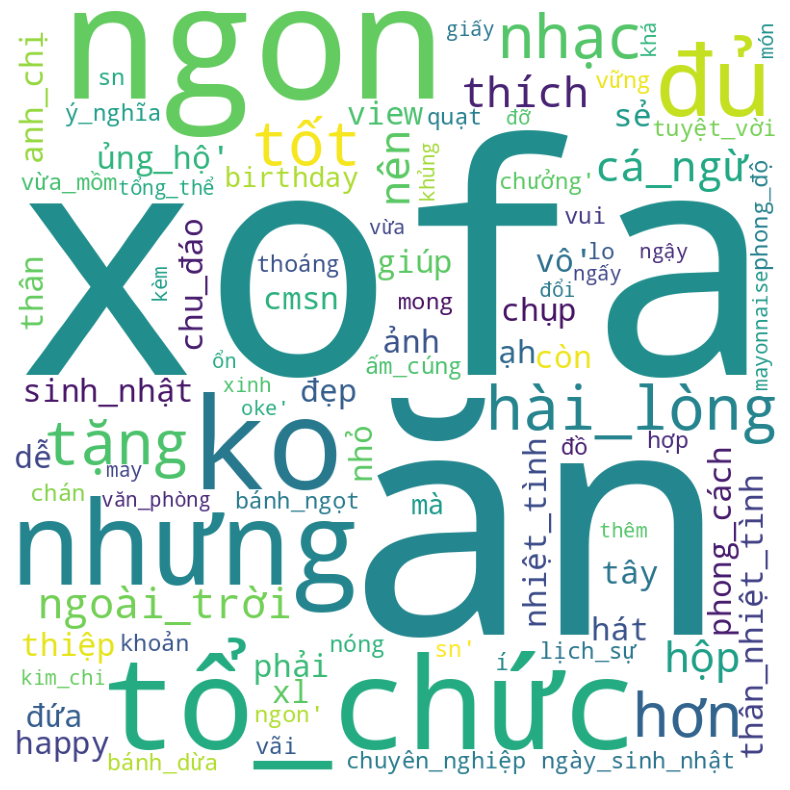

In [26]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 1)]))

fig = plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 2.2. Trung lập

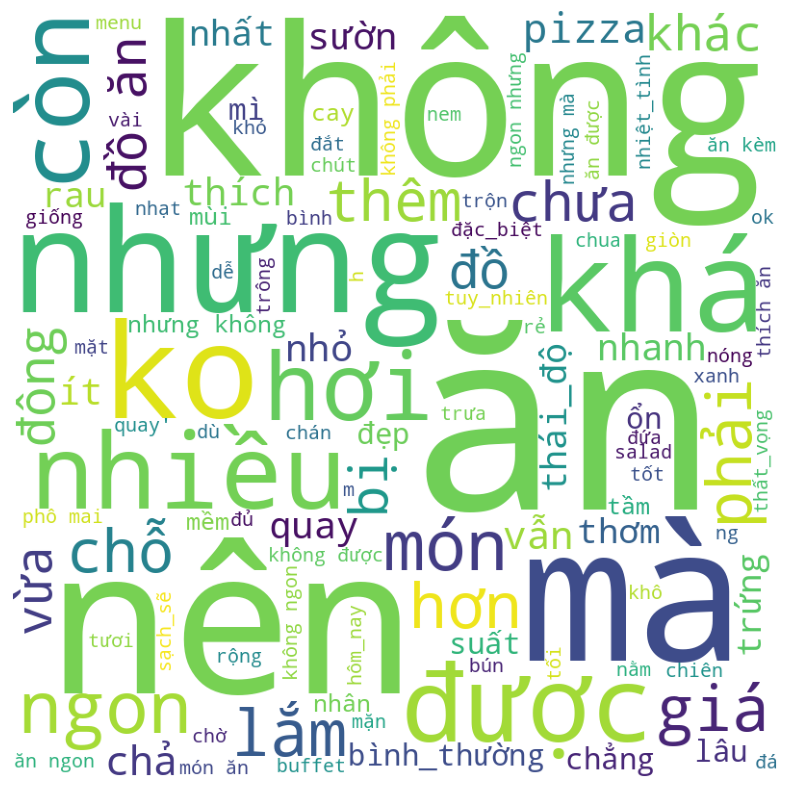

In [16]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 0)]))

fig = plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 2.3. Tiêu cực

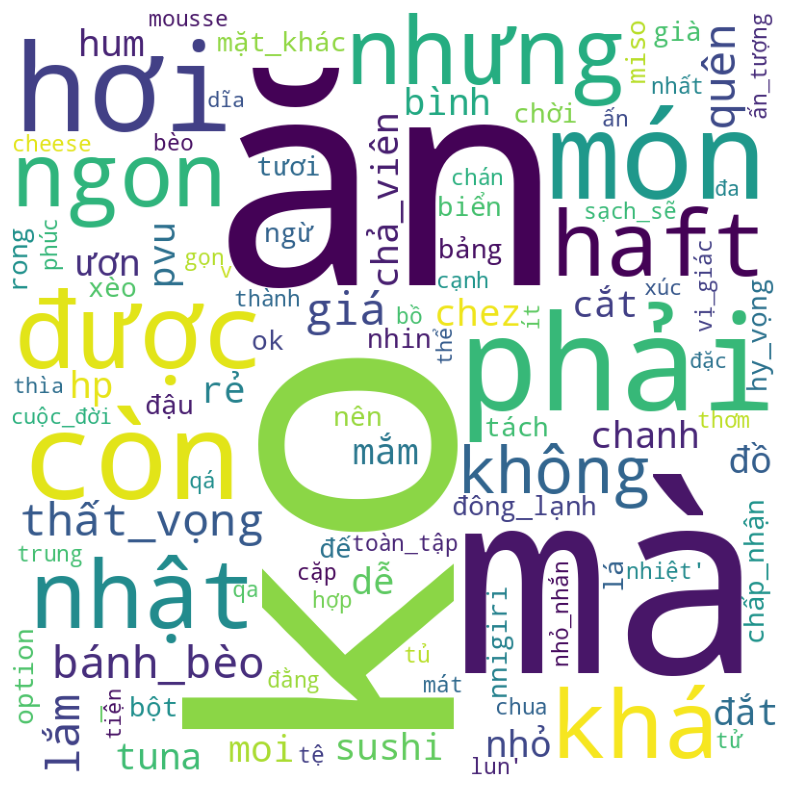

In [17]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == -1)]))

fig = plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 3. Trích xuất đặc trưng

In [27]:
# Tạo đối tượng TfidfVectorizer
tfidf = TfidfVectorizer()

# Biến đổi tập huấn luyện thành ma trận TF-IDF
train_x_tfidf = tfidf.fit_transform(train_x)

# Biến đổi tập kiểm tra thành ma trận TF-IDF
test_x_tfidf = tfidf.transform(test_x)

## 3. Huấn luyện mô hình Machine Learning

In [50]:
def display_result(model):
  print(classification_report(test_y, pred_y))
  plt.figure(figsize=(5, 3))
  conf_matrix = confusion_matrix(test_y, pred_y, labels=labels.unique())
  sb.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd')

### 3.1. KNN

In [47]:
knn = KNeighborsClassifier()
start = time.time()
knn.fit(train_x_tfidf, train_y)
print('KNN training time: %d' %(time.time() - start))

KNN training time: 0


In [49]:
pred_y = knn.predict(test_x_tfidf)
score = knn.score(test_x_tfidf, test_y)
print('KNN score: ', score)

KNN score:  0.701707097933513


              precision    recall  f1-score   support

          -1       0.76      0.46      0.58       654
           0       0.21      0.06      0.10       236
           1       0.71      0.93      0.81      1336

    accuracy                           0.70      2226
   macro avg       0.56      0.49      0.49      2226
weighted avg       0.67      0.70      0.66      2226



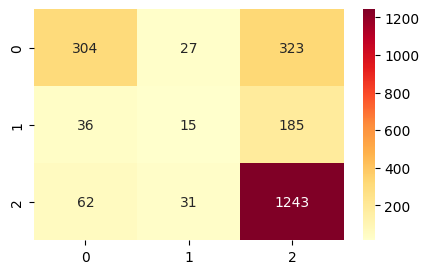

In [51]:
display_result(knn)

### 2.1. Multinomial Naive Bayes

In [52]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(train_x_tfidf, train_y)
print('Multinomial Bayes training time: %d' %(time.time() - start))

Multinomial Bayes training time: 0


In [53]:
pred_y = mnb.predict(test_x_tfidf)
score = mnb.score(test_x_tfidf, test_y)
print('Multinomial Naive Bayes score: ', score)

Multinomial Naive Bayes score:  0.7358490566037735


              precision    recall  f1-score   support

          -1       0.90      0.47      0.62       654
           0       0.00      0.00      0.00       236
           1       0.71      0.99      0.83      1336

    accuracy                           0.74      2226
   macro avg       0.54      0.49      0.48      2226
weighted avg       0.69      0.74      0.68      2226



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


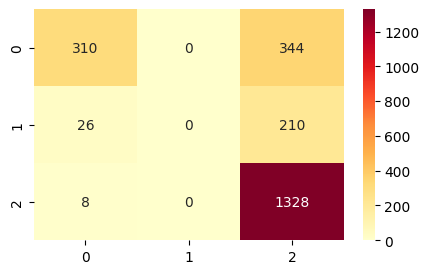

In [54]:
display_result(mnb)

### 2.2. Logistic Regression

In [55]:
lgres = LogisticRegression()
start = time.time()
lgres.fit(train_x_tfidf, train_y)
print('Logistic training time: %d' %(time.time() - start))

Logistic training time: 4


In [56]:
pred_y = lgres.predict(test_x_tfidf)

score = lgres.score(test_x_tfidf, test_y)
print('Logistic regression score: ', score)

Logistic regression score:  0.8086253369272237


              precision    recall  f1-score   support

          -1       0.80      0.78      0.79       654
           0       0.48      0.10      0.17       236
           1       0.82      0.95      0.88      1336

    accuracy                           0.81      2226
   macro avg       0.70      0.61      0.61      2226
weighted avg       0.78      0.81      0.78      2226



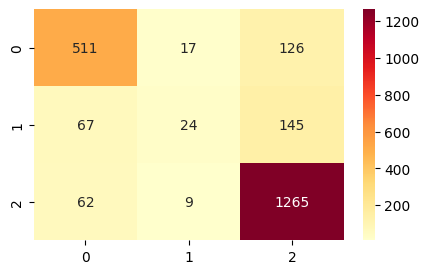

In [57]:
display_result(lgres)

### 2.3. SVM

In [58]:
svm = SVC(random_state=42)
start = time.time()
svm.fit(train_x_tfidf, train_y)
print('SVM training time: %d' %(time.time() - start))

SVM training time: 27


In [59]:
pred_y = svm.predict(test_x_tfidf)

score = svm.score(test_x_tfidf, test_y)
print('SVM score: ', score)

SVM score:  0.8059299191374663


              precision    recall  f1-score   support

          -1       0.80      0.78      0.79       654
           0       0.29      0.02      0.03       236
           1       0.81      0.96      0.88      1336

    accuracy                           0.81      2226
   macro avg       0.63      0.58      0.57      2226
weighted avg       0.75      0.81      0.76      2226



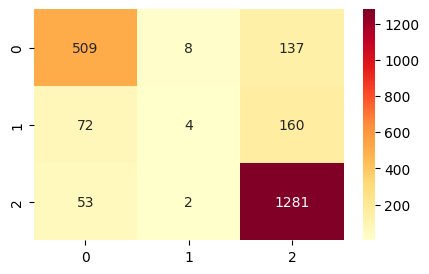

In [60]:
display_result(svm)

# Tinh chỉnh siêu tham số

## 1. GridSearch

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV, cross_val_score

In [62]:
# Define parameter grid
param_grid = {'C': np.arange(0.25,7.5,0.25),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              }

# Define grid search
grid_search = GridSearchCV(lgres, param_grid, cv=5, n_jobs=-1)

# Train the model with grid search
start = time.time()
grid_search.fit(train_x_tfidf, train_y)
print('Searching time:', (time.time() - start))

# Print the best parameters
print('Best parameters:', grid_search.best_params_)

Training time: 321.005738735199
Best parameters: {'C': 2.75, 'solver': 'liblinear'}


## 2. Best model

In [66]:
best_model = LogisticRegression(C= 2.75, solver='liblinear')
start = time.time()
best_model.fit(train_x_tfidf, train_y)
print('Logistic training time: %d' %(time.time() - start))

Logistic training time: 0


In [67]:
pred_y = best_model.predict(test_x_tfidf)

score = best_model.score(test_x_tfidf, test_y)
print('Logistic regression score: ', score)

Logistic regression score:  0.8099730458221024


              precision    recall  f1-score   support

          -1       0.80      0.79      0.79       654
           0       0.45      0.08      0.14       236
           1       0.83      0.95      0.88      1336

    accuracy                           0.81      2226
   macro avg       0.69      0.61      0.61      2226
weighted avg       0.78      0.81      0.78      2226



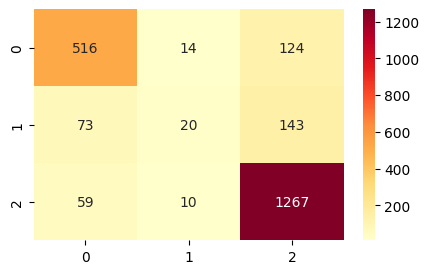

In [68]:
display_result(best_model)

# Thử nghiệm

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import math

## 1. Tiền xử lí

In [70]:
import regex as re

In [71]:
!pip install underthesea

### 1. Xóa HTML tag

In [72]:
def remove_html(text):
  return re.sub(r'<[^>]*>', '', text)

print(remove_html("<h1>Title</h1>"))

Title


### 2. Chuẩn hóa Unicode và dấu câu

In [73]:
from underthesea import text_normalize

uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

# Hàm tạo dict để convert định dạng cũ sang định dạng mới
def loaddicchar():
  dic = {}
  char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split('|')
  charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split('|')
  for i in range(len(char1252)):
      dic[char1252[i]] = charutf8[i]
  return dic

dicchar = loaddicchar()

# Chuẩn hóa Unicode và dấu câu
def convert_unicode(txt):
    txt = re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)
    return text_normalize(txt)

print(convert_unicode("Ðảm baỏ chất lựơng phòng thí nghịêm hoá học"))

Đảm bảo chất lượng phòng thí nghiệm hóa học


### 3. Đưa về dạng viết thường

In [74]:
def to_lower_case(sentence):
    sentence = sentence.lower()
    return sentence

print(to_lower_case('Tôi là dân IT!'))

tôi là dân it!


### 4. Xóa các ký tự không cần thiết

In [75]:
def remove_unnecessary_charactor(document):
    # xóa các ký tự đặc biệt, emoji
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa kí tự chứa số
    document = re.sub(r'\w*\d\w*', '', document).strip()
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

document = 'Biết 1505 là gì không? 😆'
remove_unnecessary_charactor(document)

'Biết là gì không'

### 5. Tách từ tiếng Việt

In [76]:
from underthesea import word_tokenize

sentence = 'Xin chào, rất vui được làm quen, tôi đến từ đất nước Việt Nam!'
print(word_tokenize(sentence))
print(word_tokenize(sentence, format='text'))

['Xin', 'chào', ',', 'rất', 'vui', 'được', 'làm quen', ',', 'tôi', 'đến', 'từ', 'đất nước', 'Việt Nam', '!']
Xin chào , rất vui được làm_quen , tôi đến từ đất_nước Việt_Nam !


### 6. Chuẩn hóa những từ lặp âm tiết

In [77]:
def remove_duplicate_characters(text):
    pattern = re.compile(r'(\w)\1{2,}')
    text = pattern.sub(r'\1', text)
    return text

print(remove_duplicate_characters("Trà sữa ngon nhân viên bán hàng nhiệt tình! Likeeeeeee!"))

Trà sữa ngon nhân viên bán hàng nhiệt tình! Like!


### 9. Loại bỏ stopword

Stopword là những từ thường xuyên xuất hiện trong văn nói, văn viết và không có quá nhiều ý nghĩa, đặc trưng cho bài toán phân loại cảm xúc trong câu. Ví dụ về stopword như: là, rằng, theo, thì, đó,...

In [ ]:
%cd /content
%rm -r /content/CS114
!git clone https://github.com/npk7264/CS114.git

In [79]:
stopwords = open('/content/CS114/Final_project/code/stopword.txt')
stopwords = stopwords.readlines()
stopwords = [x.strip() for x in stopwords]

**Note**: Bộ dữ liệu stopword từ github đã được custom cho phù hợp với bài toán

In [80]:
len(stopwords)

1822

In [81]:
def remove_stopwords(document):
  words = document.split(' ')
  res = list()
  for word in words:
    if word not in stopwords:
      res.append(word)

  return ' '.join(res)

### 10. Tổng hợp

In [82]:
def text_preprocessing(document):
  document = remove_html(document)
  document = convert_unicode(document)
  document = to_lower_case(document)
  document = remove_unnecessary_charactor(document)
  document = word_tokenize(document, format='text')
  document = remove_duplicate_characters(document)
  document = re.sub(r'\s+', ' ', document).strip() # xóa khoảng trắng thừa
  document = re.sub(r'\s+', ' ', document).strip() # xóa khoảng trắng thừa
  document = remove_stopwords(document)
  return document

text_preprocessing("Không cần theo nghị định đã ban hành, người dân cần ở trong nhà đến hết ngày 16/9.")

'không cần nghị_định ban_hành dân cần'

## 2. Dự đoán 1 bình luận

In [83]:
def predict_sentiment():
  review = text_preprocessing(input("Nhập bình luận: "))
  print("Tiền xử lí: ", review)
  review_tfidf = tfidf.transform([review])
  sentiment = best_model.predict(review_tfidf)[0]
  if sentiment == 1:
    print("Cảm xúc: tích cực")
  elif sentiment == 0:
      print("Cảm xúc: trung lập")
  else:
      print("Cảm xúc: tiêu cực")

In [88]:
predict_sentiment()

Nhập bình luận: Mình thấy ổn, mọi người rảnh ghé quán trải nghiệm thử thế nào
Tiền xử lí:  ổn rảnh ghé trải_nghiệm
Cảm xúc: tích cực


In [86]:
predict_sentiment()

Nhập bình luận: Bình thường chứ ko ngon lắm
Tiền xử lí:  bình_thường ko ngon lắm
Cảm xúc: trung lập


In [89]:
predict_sentiment()

Nhập bình luận: Ghé ăn thử thôi chứ review thiệt tình là dở lắm mọi người ơi
Tiền xử lí:  ghé ăn review thiệt tình dở lắm
Cảm xúc: tiêu cực


In [90]:
predict_sentiment()

Nhập bình luận: Quán cũ, vị trí thì khó tìm. Mà đồ ăn cũng ko ngon nữa
Tiền xử lí:  cũ khó tìm mà đồ ăn ko ngon
Cảm xúc: tiêu cực


In [91]:
predict_sentiment()

Nhập bình luận: Có cho tiền cũng ko ghé quán ăn nữa đâu nhé
Tiền xử lí:  ko ghé ăn
Cảm xúc: tiêu cực


In [94]:
predict_sentiment()

Nhập bình luận: Quán làm ăn kiểu này có chó mới tới ăn, đã đắt rồi mà ko ngon nữa làm gì ngta ghé
Tiền xử lí:  làm_ăn chó ăn đắt mà ko ngon ngta ghé
Cảm xúc: tiêu cực


In [95]:
predict_sentiment()

Nhập bình luận: ăn tạm được
Tiền xử lí:  ăn tạm được
Cảm xúc: trung lập


In [97]:
predict_sentiment()

Nhập bình luận: Không thể không khen được
Tiền xử lí:  không_thể không khen được
Cảm xúc: tiêu cực


In [101]:
predict_sentiment()

Nhập bình luận: Nấu vị khó ăn
Tiền xử lí:  nấu khó ăn
Cảm xúc: tiêu cực


In [102]:
predict_sentiment()

Nhập bình luận: Thái độ quán vui vẻ, sẽ ghé nữa
Tiền xử lí:  thái_độ vui_vẻ ghé
Cảm xúc: tiêu cực


In [109]:
predict_sentiment()

Nhập bình luận: Quán phục vụ nhiệt tình, đồ ăn ngon, rẻ, có điều chủ quán mặt hơi thái độ xíu
Tiền xử lí:  nhiệt_tình đồ ăn ngon rẻ mặt hơi thái_độ xíu
Cảm xúc: tích cực


In [110]:
predict_sentiment()

Nhập bình luận: Ăn tạm được chứ ko ngon lắm đâu
Tiền xử lí:  ăn tạm được ko ngon lắm
Cảm xúc: trung lập


In [112]:
predict_sentiment()

Nhập bình luận: Gần chỗ học nên hay ghé ăn
Tiền xử lí:  chỗ học nên ghé ăn
Cảm xúc: tích cực
